In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

import warnings
warnings.filterwarnings('ignore')

In [2]:
adata_dir = "data_level_1/adata/"
he_image_dir = "data_level_1/he_registered_old/"

In [6]:
sample = 'X17'
adata = sc.read_h5ad(adata_dir + f'{sample}.h5ad')
he_image = plt.imread(he_image_dir + f'{sample}.tiff')

In [7]:
slide_id = adata.obs['Slide_ID'][0]
adata.uns['spatial'][slide_id]['images']['he_downscaled_aligned'] = he_image  
adata.uns['spatial'][slide_id]['scalefactors']['tissue_he_downscaled_aligned_scalef'] = 1

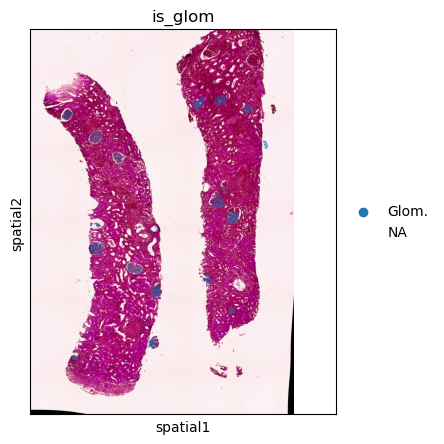

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))

adata.obs['is_glom'] = ['Glom.' if i=='Glom.' else np.nan for i in adata.obs['nichepca_domain_tuned']]

sc.pl.spatial(adata,
              library_id = slide_id,
              img_key = 'he_downscaled_aligned',
              color = 'is_glom',
              size = .2,
              ax = ax,
              show = True)

In [32]:
## test

(3751, 3215, 3)

In [35]:
image = he_image[:,:,0]

In [36]:
image.shape

(3751, 3215)

In [43]:
LEVEL = 1
ID = adata.obs.Slide_ID.unique()[0]
scale_factor = adata.uns["spatial"][ID]["scalefactors"][f"tissue_dapi_LEVEL{LEVEL}_scalef"]
dapi = adata.uns["spatial"][ID]["images"][f"dapi_LEVEL{LEVEL}"+"_cropped"]
dapi.shape

(3674, 3215, 3)

In [58]:
adata.obsm["spatial"].min(axis=0), adata.obsm["spatial"].max(axis=0) + 350

(array([350.00350317, 350.79202632]), array([3214.38127619, 3673.66131013]))

In [77]:
adata.obs['dapi'] = [dapi[int(j), int(i), 0] for i, j in adata.obsm["spatial"]]

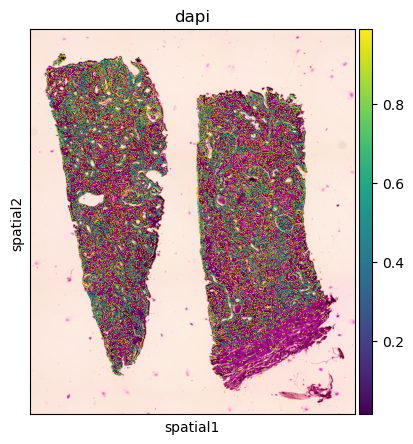

In [78]:
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.spatial(adata,
              library_id = slide_id,
              img_key = 'he_downscaled_aligned',
              color = 'dapi',
              size = .2,
              ax = ax,
              show = True)